In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from deconv.imports import load_tables, load_figures, infer_x
from deconv.figures.common import subplotLabel, getSetup

In [2]:
A_antiD, A_antiTNP, glycan_list = load_tables()
adcc_3a, adcc_3b = load_figures()

In [3]:
mean_3a = (adcc_3a.groupby(level=0).sum()) / 4
mean_3b = (adcc_3b.groupby(level=0).sum()) / 4

In [4]:
A = np.concatenate((A_antiD, A_antiTNP), axis=0)

In [5]:
double_3a = np.concatenate((mean_3a, mean_3a), axis=0)
double_3b = np.concatenate((mean_3b, mean_3b), axis=0)

In [6]:
glycans_3a = infer_x(A, double_3a)
glycans_3b = infer_x(A, double_3b)

original_3a = infer_x(A_antiD, mean_3a)
original_3b = infer_x(A_antiD, mean_3b)

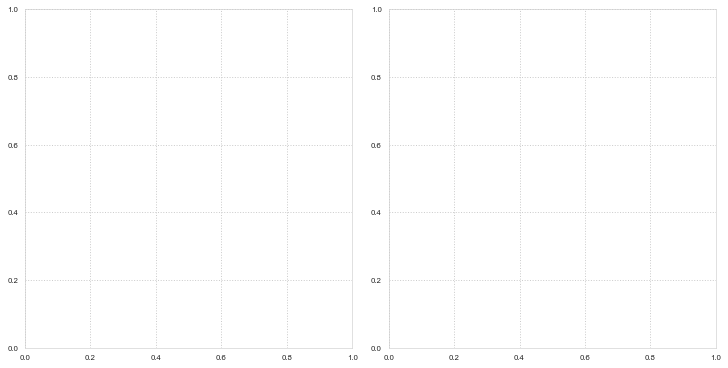

In [7]:
ax, f = getSetup((10, 5), (1, 2))

In [8]:
width = 0.35
ind = np.arange(len(glycan_list))

ax[0].bar(ind - width/2, glycans_3a, width, label = 'Anti-D and Anti-TNP')
ax[0].bar(ind + width/2, original_3a, width, label = 'Anti-D')
ax[0].set_title("Anti-D and Anti-TNP (Fig. 3A)")
ax[0].set_xlabel("Glycans")
ax[0].set_xticklabels(glycan_list, Rotation=90)
ax[0].set_xticks(ind)
ax[0].legend()

In [9]:
ax[1].bar(ind - width/2, glycans_3b, width, label = 'Anti-D and Anti-TNP')
ax[1].bar(ind + width/2, original_3b, width, label = 'Anti-D')
ax[1].set_title("Anti-D and Anti-TNP (Fig. 3B)")
ax[1].set_xlabel("Glycans")
ax[1].set_xticklabels(glycan_list, Rotation=90)
ax[1].set_xticks(ind)
ax[1].legend()

In [10]:
# Add subplot labels
subplotLabel(ax)

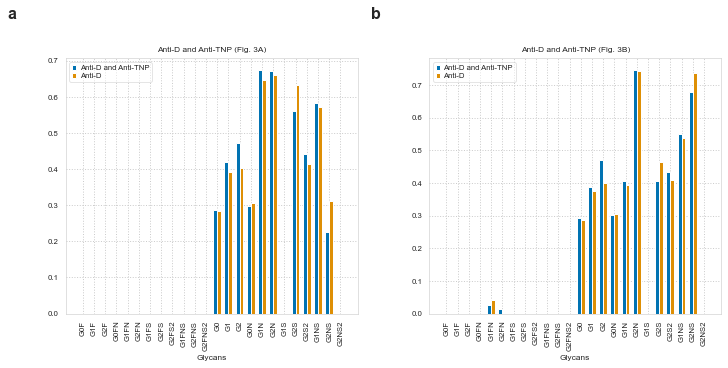

In [11]:
f